## Random Forest on Child dataset

Loading dependencies

In [7]:
#devtools::install_github("tidyverse/googlesheets4")
library(dplyr)
library(randomForest)
library(googlesheets4)

options(repr.plot.width=10, repr.plot.height=12)

Loading Child dataset

In [2]:
## Loading data
child <- read.table('~/sc/obesity/data/child_forest_imputed.tsv',
                    sep = '\t', header = TRUE)
child.p <- dplyr::select(child, 
                         Body.mass.index,
                         Percent.CD4.T.cells:Percent.DRpositive.CD38negative.of.CD8.Tem.cells)

### Running Random Forest

In [3]:
forest.child <- randomForest(Body.mass.index ~., data = child.p)

## Plotting results

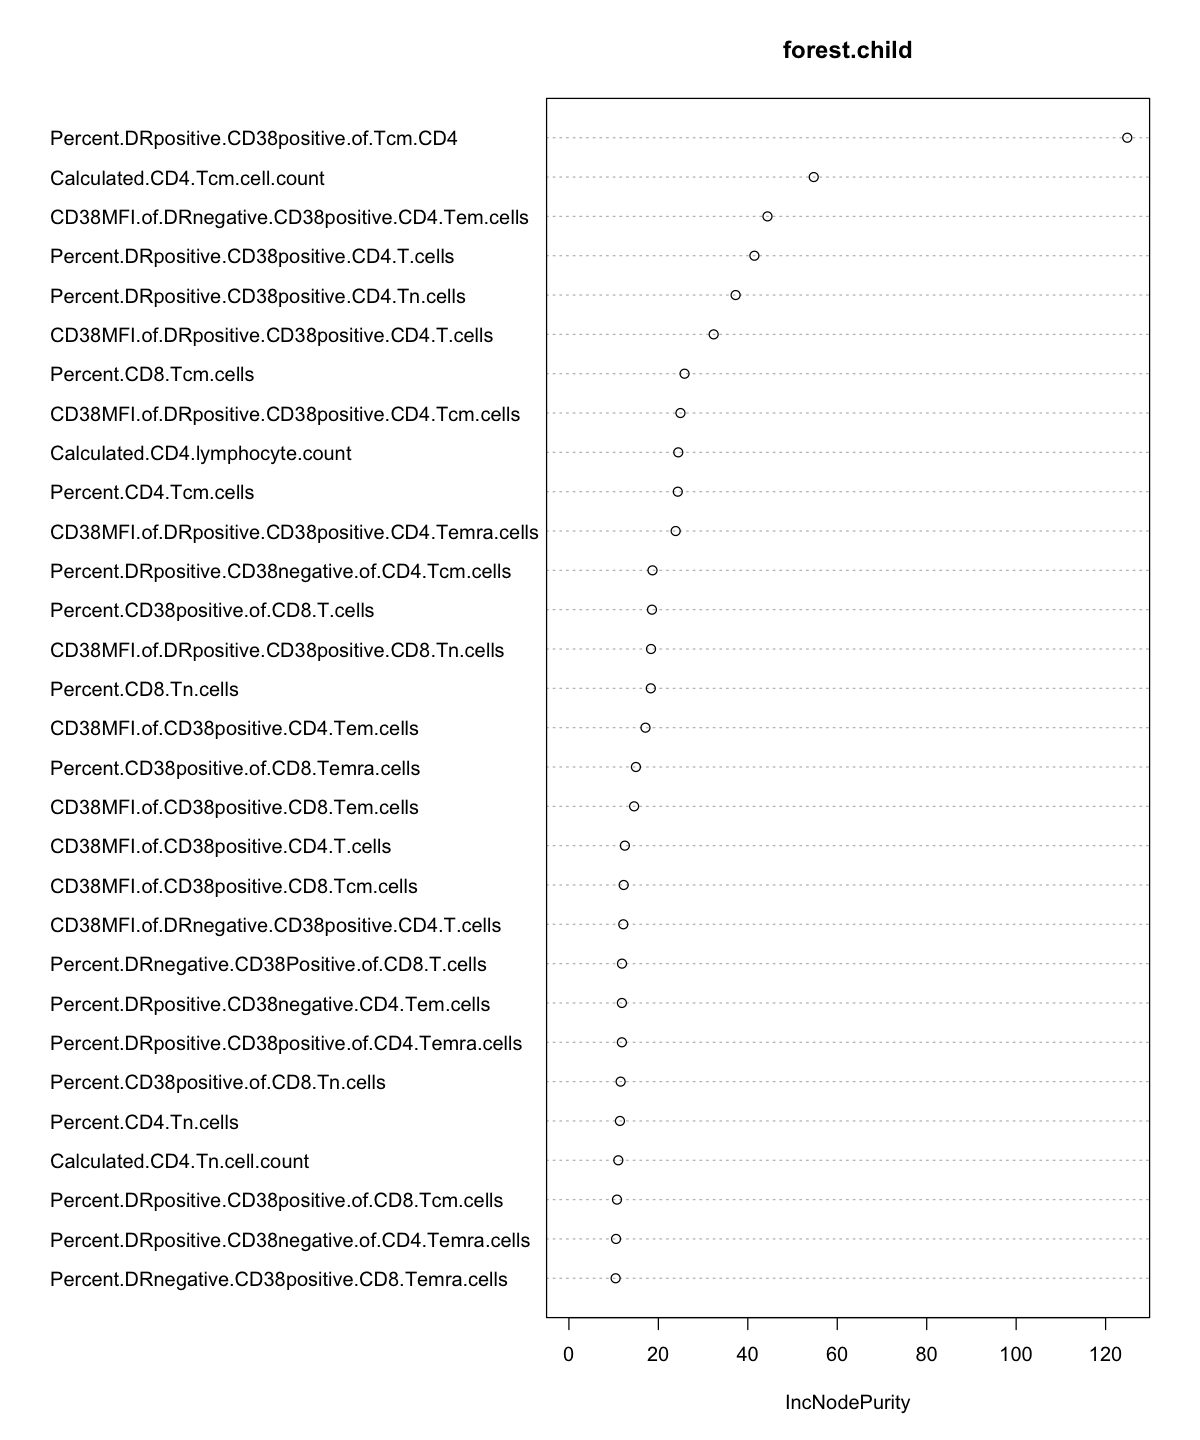

In [43]:
varImpPlot(forest.child)

In [58]:
child.df <- data.frame(IncNodePurity = forest.child$importance[,1],
            variable = rownames(forest.child$importance))
child.df %>% arrange(desc(IncNodePurity)) %>%
        write.table('~/sc/obesity/data/child_forest_importance.tsv', sep = '\t', row.names =F)

# Random Forest in the adult dataset

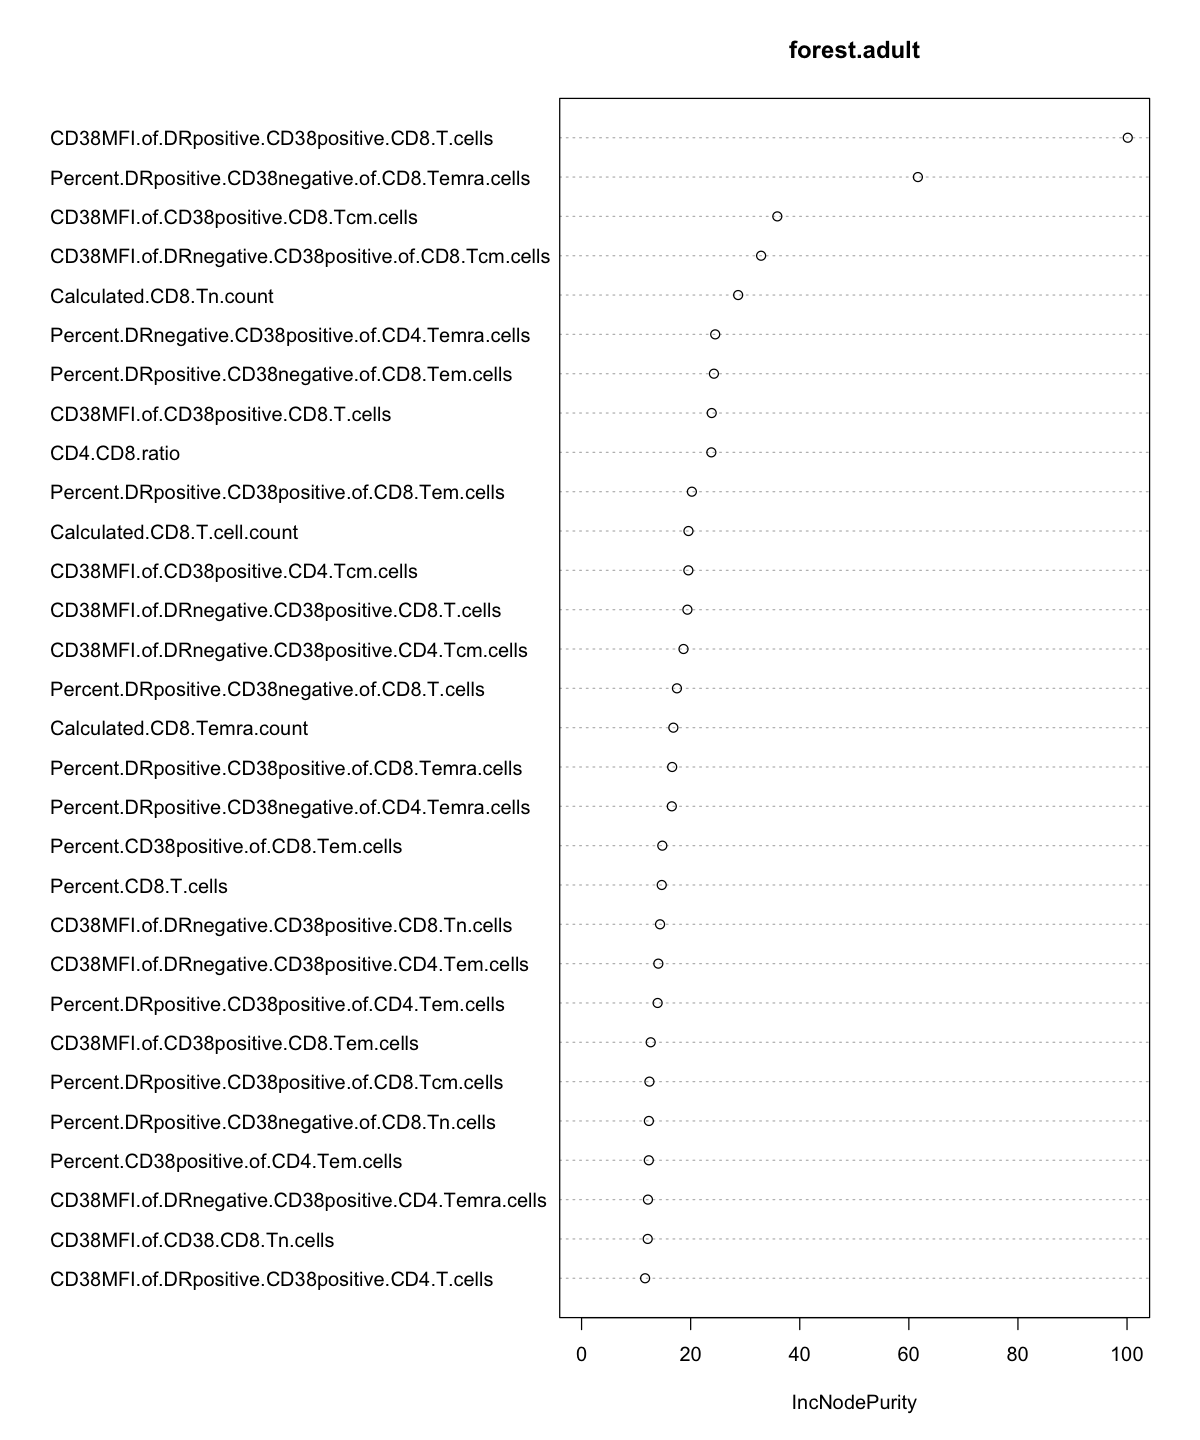

In [46]:
adult <- read.table('~/sc/obesity/data/adult_forest_imputed.tsv',
                    sep = '\t', header = TRUE)
adult.p <- dplyr::select(adult, 
                         Body.mass.index,
                         Percent.CD4.T.cells:Percent.DRpositive.CD38negative.of.CD8.Tem.cells)
forest.adult <- randomForest(Body.mass.index ~., data = adult.p)
varImpPlot(forest.adult)

In [59]:
adult.df <- data.frame(IncNodePurity = forest.adult$importance[,1],
            variable = rownames(forest.adult$importance))
adult.df %>% arrange(desc(IncNodePurity)) %>%
        write.table('~/sc/obesity/data/adult_forest_importance.tsv', sep = '\t', row.names =F)